## 数据探索与可视化

### 实验目标
- 学习并掌握如何使用Python进行数据探索与可视化。
- 理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
- 使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
- 利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。

### 实验要求

1. 使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
2. 使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。
使用describe()方法生成数据的描述性统计信息。
3. 对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
4. 对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。
5. 使用Matplotlib绘制图表
    - 绘制条形图：展示label列的类别分布。
    - 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
    - 绘制直方图：展示log_public_repos的对数变换后的数据分布。
    - 绘制散点图：展示public_repos与followers之间的关系。
    - 绘制散点矩阵：展示多个数值型特征之间的成对关系。
6. 使用Seaborn绘制图表
    - 绘制箱线图：展示不同label类别下log_followers的分布。
    - 绘制成对图：展示不同特征之间的成对关系，并根据label分类。
    - 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
    - 绘制小提琴图：展示label与log_followers之间的分布差异。
7. 使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

使用head()方法查看数据的前几行
   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9 

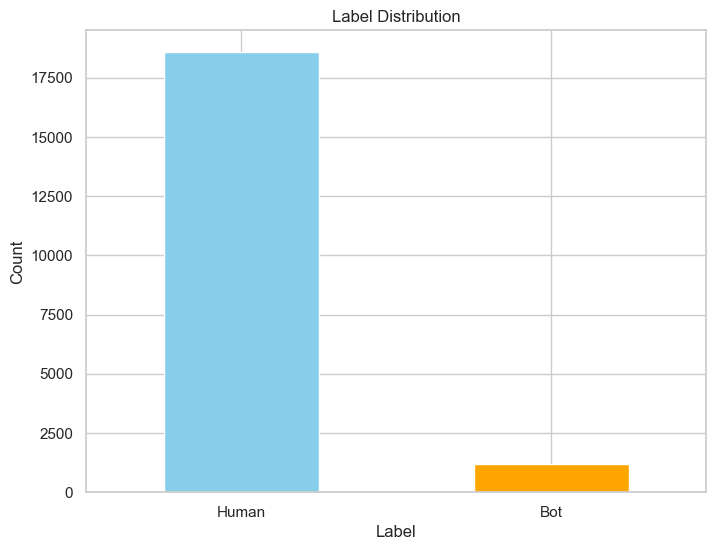

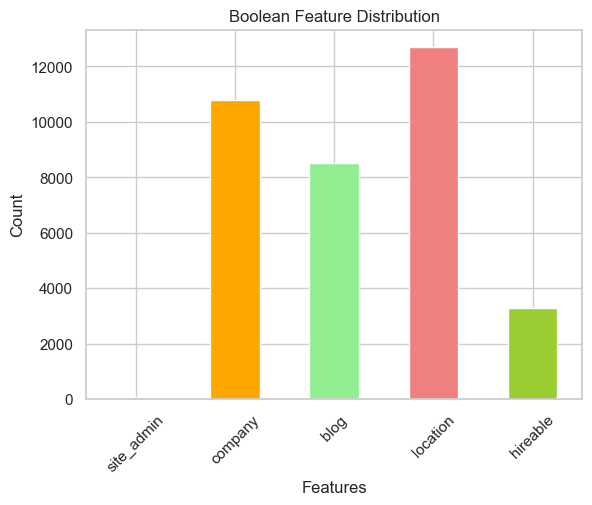

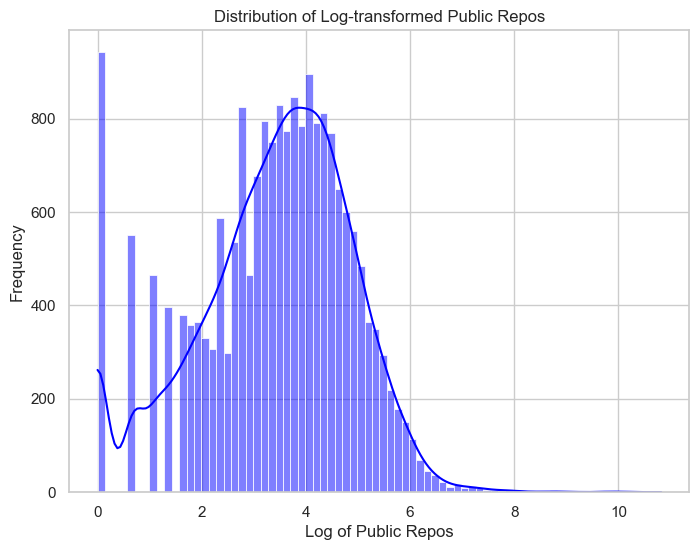

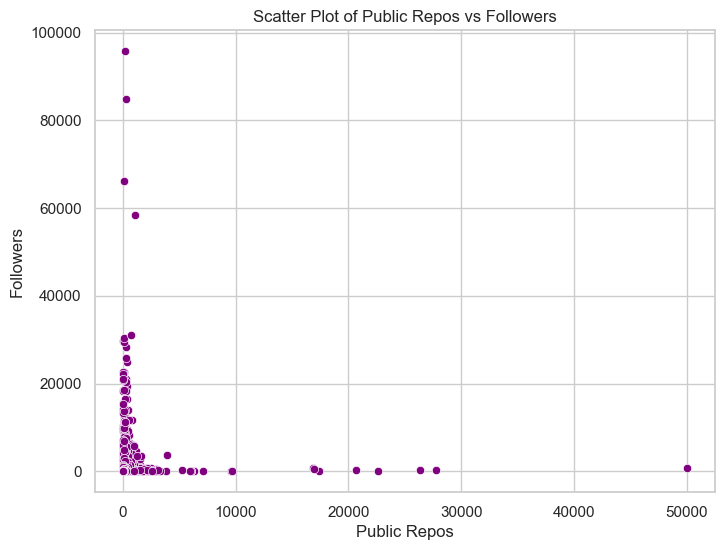

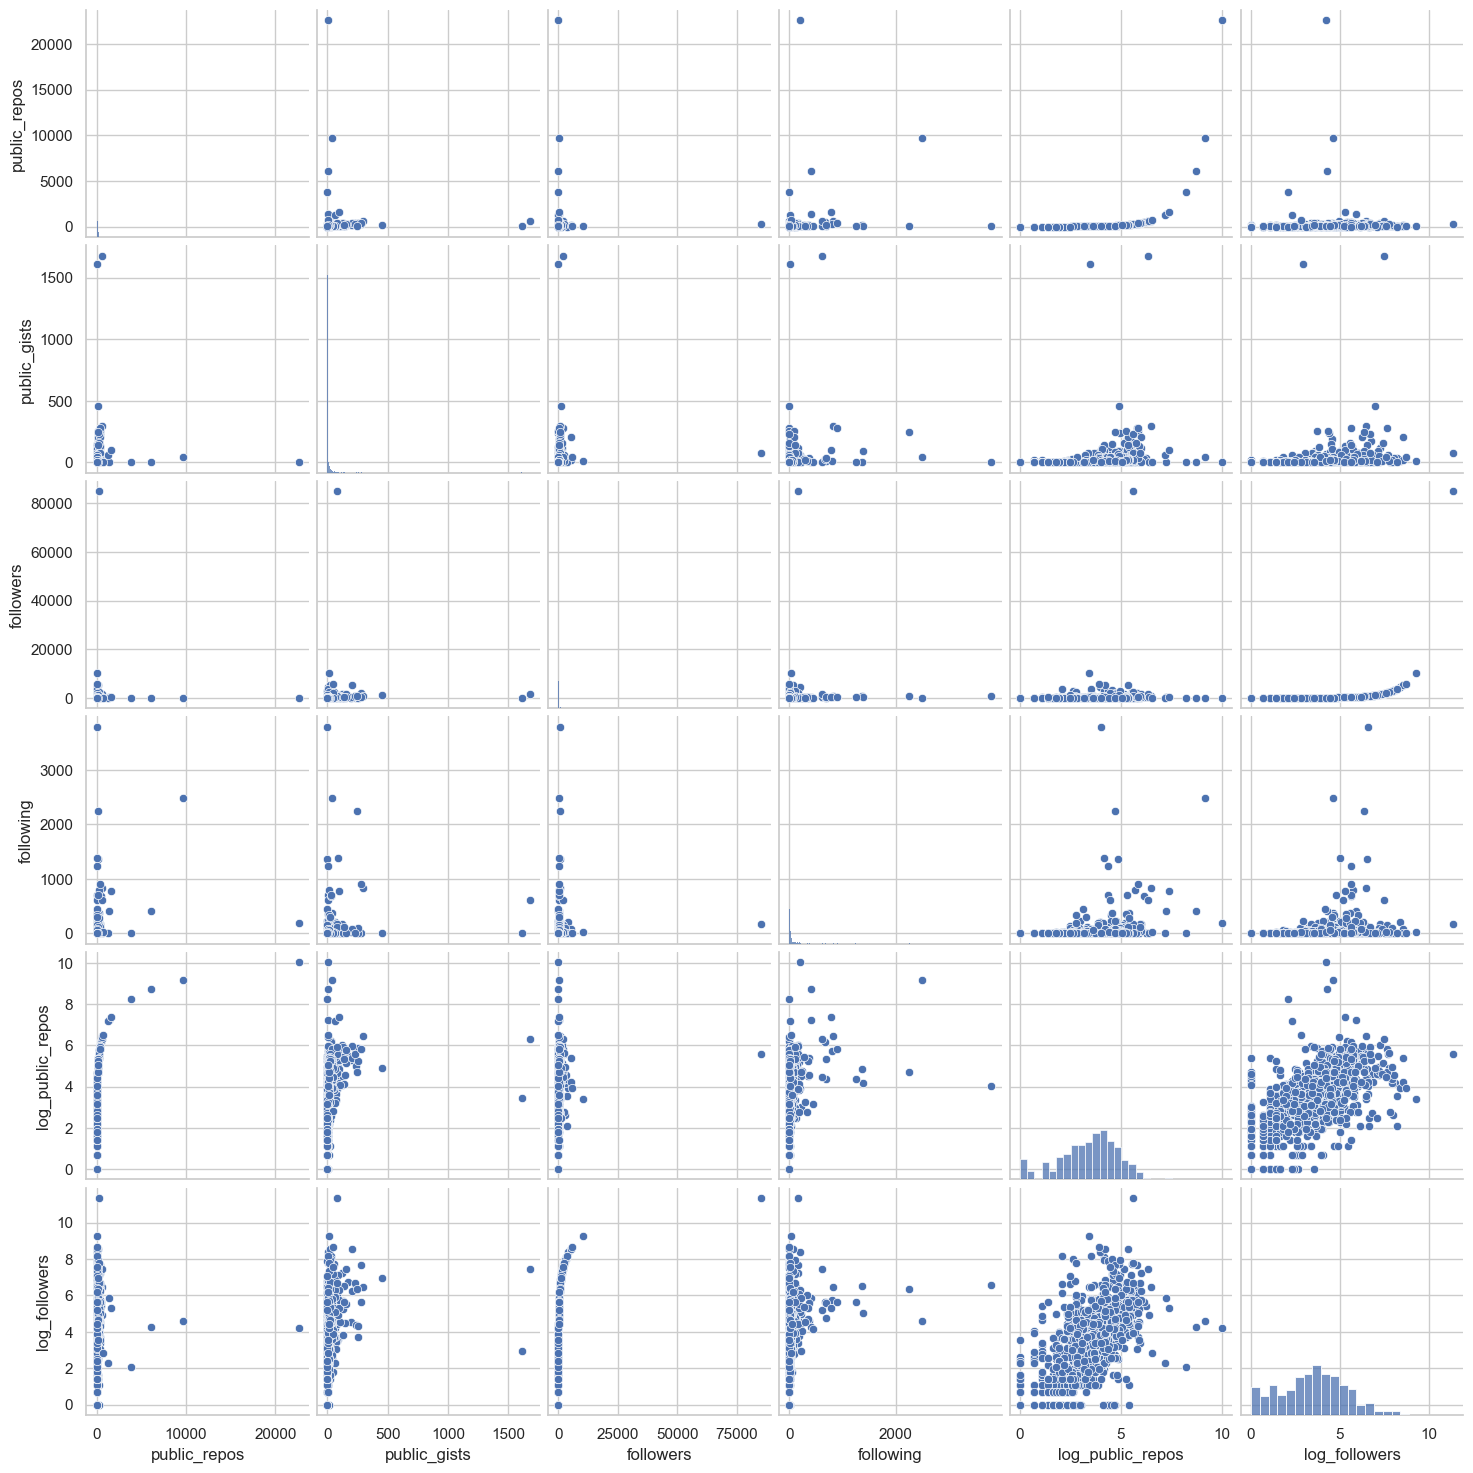

C:\Users\Frank\AppData\Local\Temp\ipykernel_32596\3889245356.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='log_followers', data=raw_data, palette='Set2')


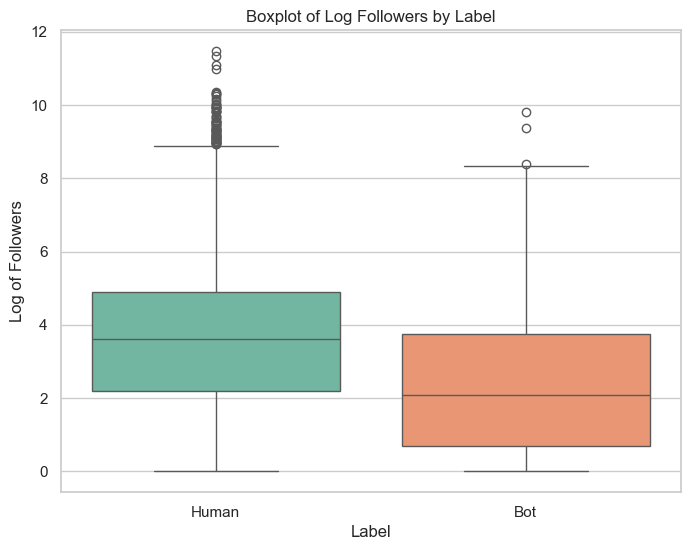

<Figure size 1000x800 with 0 Axes>

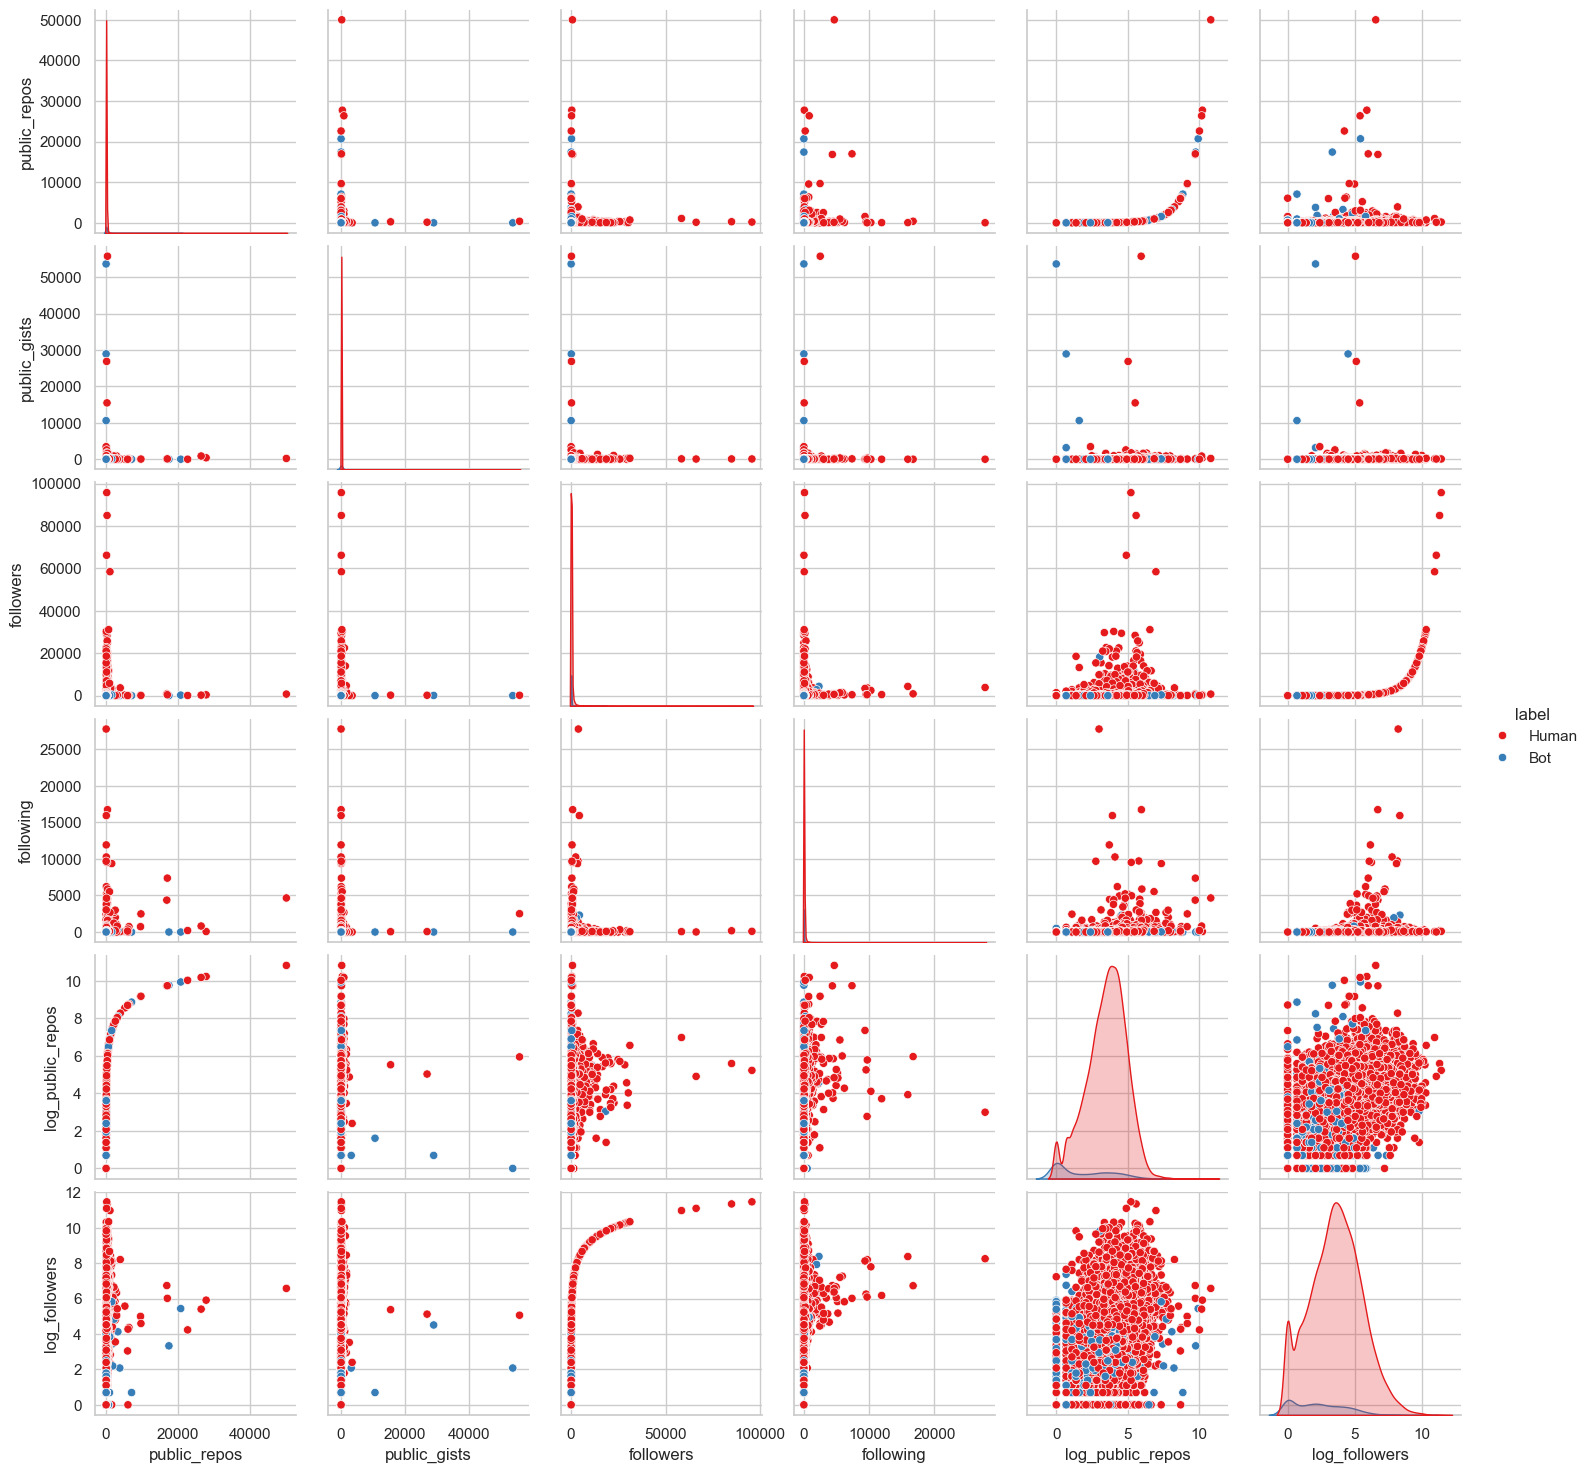

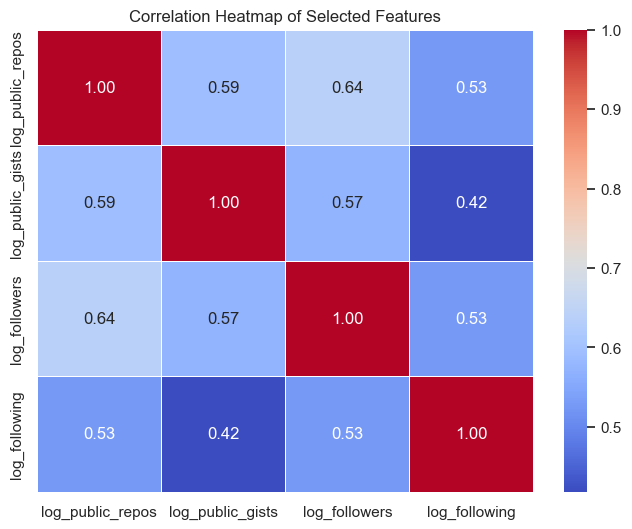

C:\Users\Frank\AppData\Local\Temp\ipykernel_32596\3889245356.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label', y='log_followers', data=raw_data, palette='muted')


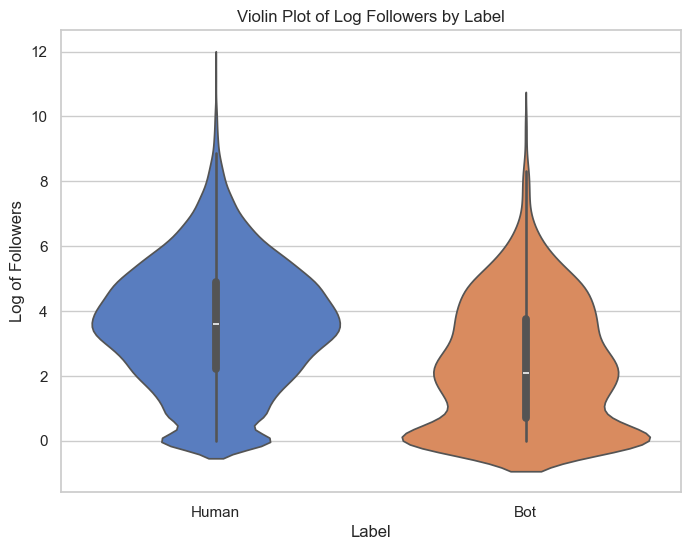

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

raw_data = pd.read_csv('data/github_bot_processed_data.csv') 



#使用head()方法查看数据的前几行，
print("使用head()方法查看数据的前几行")
print(raw_data.head()) 
# 并使用info()方法查看每列的数据类型，观察两者的区别。
print("使用info()方法查看每列的数据类型")
print(raw_data.info())
#使用describe()方法生成数据的描述性统计信息
print("用describe()方法生成数据的描述性统计信息")
print(raw_data.describe())  # 生成描述性统计信息
#对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
raw_data['created_at'] = pd.to_datetime(raw_data['created_at'])
raw_data['updated_at'] = pd.to_datetime(raw_data['updated_at'])
print(raw_data.head()) 
#对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。
#对于数值列，可以使用np.log1p()（即log(x + 1)）来避免对零值的处理问题
# 然后可以查看这些列的对数变换效果，观察是否改善了数据分布的偏态。
raw_data['log_public_repos'] = np.log1p(raw_data['public_repos'])
raw_data['log_public_gists'] = np.log1p(raw_data['public_gists'])
raw_data['log_followers'] = np.log1p(raw_data['followers'])
raw_data['log_following'] = np.log1p(raw_data['following'])
print("查看对数变化后的列")
print(raw_data[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].head())

# 设置绘图风格
sns.set_theme(style="whitegrid")

# 1. 绘制条形图：展示label列的类别分布
plt.figure(figsize=(8, 6))
raw_data['label'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# 2. 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布
boolean_columns = ['site_admin', 'company', 'blog', 'location', 'hireable']
raw_data[boolean_columns].sum().plot(kind='bar', stacked=True, color=['skyblue', 'orange', 'lightgreen', 'lightcoral', 'yellowgreen'])
plt.title('Boolean Feature Distribution')
plt.xlabel('Features')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 3. 绘制直方图：展示log_public_repos的对数变换后的数据分布
plt.figure(figsize=(8, 6))
sns.histplot(raw_data['log_public_repos'], kde=True, color='blue')
plt.title('Distribution of Log-transformed Public Repos')
plt.xlabel('Log of Public Repos')
plt.ylabel('Frequency')
plt.show()

# 4. 绘制散点图：展示public_repos与followers之间的关系
plt.figure(figsize=(8, 6))
sns.scatterplot(x='public_repos', y='followers', data=raw_data, color='purple')
plt.title('Scatter Plot of Public Repos vs Followers')
plt.xlabel('Public Repos')
plt.ylabel('Followers')
plt.show()

# 5. 绘制散点矩阵：展示多个数值型特征之间的成对关系
numeric_columns = ['public_repos', 'public_gists', 'followers', 'following', 'log_public_repos', 'log_followers']
sample_data = raw_data.sample(n=1000, random_state=42)
sns.pairplot(sample_data[numeric_columns], kind='scatter')
plt.show()

# 1. 绘制箱线图：展示不同label类别下log_followers的分布
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='log_followers', data=raw_data, palette='Set2')
plt.title('Boxplot of Log Followers by Label')
plt.xlabel('Label')
plt.ylabel('Log of Followers')
plt.show()

# 2. 绘制成对图：展示不同特征之间的成对关系，并根据label分类
plt.figure(figsize=(10, 8))
sns.pairplot(raw_data[numeric_columns + ['label']], hue='label', palette='Set1')
plt.show()

# 3. 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性
corr = raw_data[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

# 4. 绘制小提琴图：展示label与log_followers之间的分布差异
plt.figure(figsize=(8, 6))
sns.violinplot(x='label', y='log_followers', data=raw_data, palette='muted')
plt.title('Violin Plot of Log Followers by Label')
plt.xlabel('Label')
plt.ylabel('Log of Followers')
plt.show()

import ydata_profiling
# 生成交互式分析报告
profile = ydata_profiling.ProfileReport(raw_data, title="GitHub Bot Data Profiling Report", explorative=True)

# 将报告保存为HTML文件
profile.to_file("github_bot_data_report.html")
# 你可以通过打开生成的HTML文件来查看报告
